In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
DATA = '../Data/out.moreno_crime_crime'
ROLE = '../Data/rel.moreno_crime_crime.person.role'
NAME = '../Data/ent.moreno_crime_crime.person.name'
SEX =  '../Data/ent.moreno_crime_crime.person.sex'

In [3]:
with open(DATA) as f:
    data = f.read().splitlines()
    
with open(ROLE) as f:
    role = f.read().splitlines()
    
with open(NAME) as f:
    name = f.read().splitlines()
    
with open(SEX) as f:
    sex = f.read().splitlines()
    
for i in range(len(data)):
    data[i] = 'c' + data[i]

In [4]:
B = nx.read_edgelist(data)
len(B.nodes()), len(B.edges())

(1380, 1476)

In [5]:
graph = np.loadtxt(DATA)
a = np.unique(graph[:,0])
b = np.unique(graph[:,1])
a = ['c' + str(int(a)) for a in a]
b = [str(int(b)) for b in b]
len(a), len(b)

(829, 551)

In [6]:
G = nx.Graph()
for j in range(len(a)):
    G.add_node(a[j], bipartite=0, data=True, name=name[j], sex=sex[j])
print(len(G.nodes()))
G.add_nodes_from(b, bipartite=1, data=True)
print(len(G.nodes())-829)

829
551


In [7]:
print(len(G.nodes()))
nx.get_node_attributes(G, 'name')

1380


{'c1': 'AbelDennis',
 'c2': 'AbramsChad',
 'c3': 'AbramsDavid',
 'c4': 'AbramsDon',
 'c5': 'AbramsRichard',
 'c6': 'AdamsCurtis',
 'c7': 'AdamsMartha',
 'c8': 'AdamsReggie',
 'c9': 'AlexanderDevon',
 'c10': 'AlexanderNolan',
 'c11': 'AlexanderTrina',
 'c12': 'AlleynCamilla',
 'c13': 'AlleynCarolyn',
 'c14': 'AlleynDylan',
 'c15': 'AmadaDaron',
 'c16': 'AmanaRalph',
 'c17': 'AndersonMitch',
 'c18': 'AndersonWinston',
 'c19': 'AndrewsAlice',
 'c20': 'AndrewsHowie',
 'c21': 'AndrewsJoan',
 'c22': 'AndrewsSally',
 'c23': 'AngellDiana',
 'c24': 'ArcherThora',
 'c25': 'ArcherJr.Dylan',
 'c26': 'ArmandeBrian',
 'c27': 'ArmbrusterCassia',
 'c28': 'ArmstrongPearl',
 'c29': 'ArthurDean',
 'c30': 'AshRalph',
 'c31': 'AsherJames',
 'c32': 'AveryPhil',
 'c33': 'AveryTerry',
 'c34': 'BackusConner',
 'c35': 'BaconFrancis',
 'c36': 'BallMarvin',
 'c37': 'BallMelvin',
 'c38': 'BallLester',
 'c39': 'BarkerCatherine',
 'c40': 'BarkerMarianne',
 'c41': 'BarkerQuincy',
 'c42': 'BarretScott',
 'c43': 'Barre

In [8]:
i = 0
for edge in B.edges():
    G.add_edge(edge[0], edge[1], weight= [role[i]])
    i+=1

len(G.nodes()), len(G.edges)

(1380, 1476)

In [9]:
nx.get_edge_attributes(G, 'weight')

{('c1', '1'): ['Suspect'],
 ('c1', '2'): ['Victim'],
 ('c1', '3'): ['Victim'],
 ('c1', '4'): ['Suspect'],
 ('c2', '5'): ['Suspect'],
 ('c2', '6'): ['Suspect'],
 ('c2', '7'): ['Suspect'],
 ('c2', '8'): ['Suspect'],
 ('c2', '9'): ['Suspect'],
 ('c2', '10'): ['Witness'],
 ('c2', '11'): ['Suspect'],
 ('c2', '12'): ['Suspect'],
 ('c2', '13'): ['Suspect'],
 ('c2', '14'): ['Suspect'],
 ('c2', '15'): ['Victim'],
 ('c2', '16'): ['Suspect'],
 ('c2', '17'): ['Suspect'],
 ('c2', '18'): ['Suspect'],
 ('c2', '19'): ['Victim'],
 ('c2', '20'): ['Suspect'],
 ('c2', '21'): ['Suspect'],
 ('c2', '22'): ['Suspect'],
 ('c2', '23'): ['Suspect'],
 ('c2', '24'): ['Suspect'],
 ('c2', '25'): ['Victim'],
 ('c2', '26'): ['Victim'],
 ('c3', '27'): ['Victim'],
 ('c4', '24'): ['Suspect'],
 ('c5', '19'): ['Suspect'],
 ('c6', '28'): ['Victim'],
 ('c7', '29'): ['Witness'],
 ('c8', '30'): ['Victim'],
 ('c9', '31'): ['Suspect'],
 ('c10', '32'): ['Suspect'],
 ('c10', '33'): ['Witness'],
 ('c10', '34'): ['Victim'],
 ('c10',

In [10]:
cluster = bipartite.clustering(B)
sum(cluster.values())/len(cluster.values())

0.4274751302606178

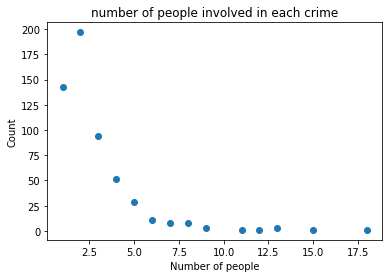

In [11]:
e_p = []
e_c = []
for k in G.nodes():
    if G.nodes[k]["bipartite"] == 0:
        e_p.append(len(G.edges(k)))
    else:
        e_c.append(len(G.edges(k)))

e_cc = Counter(e_c)
plt.scatter(e_cc.keys(), e_cc.values())
plt.title('number of people involved in each crime')
plt.xlabel('Number of people')
plt.ylabel('Count');

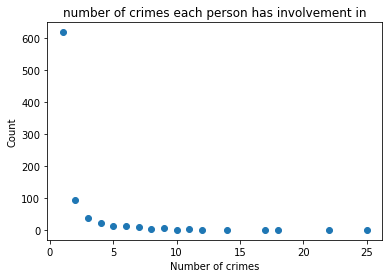

In [12]:
e_pc = Counter(e_p)
plt.scatter(e_pc.keys(), e_pc.values())
plt.title('number of crimes each person has involvement in')
plt.xlabel('Number of crimes')
plt.ylabel('Count');

In [13]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

829


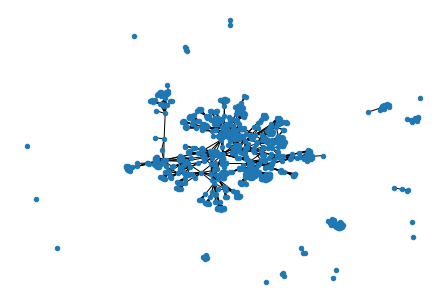

In [14]:
P = bipartite.weighted_projected_graph(G, top_nodes)
print(len(P.nodes()))
nx.draw(P, node_size=20)

551


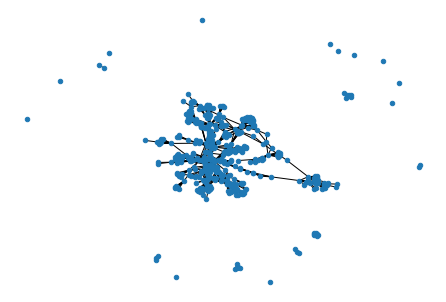

In [15]:
C = bipartite.weighted_projected_graph(G, bottom_nodes)
print(len(C.nodes))
nx.draw(C, node_size=20)